## **_import required libraries_**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import randn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**_for doing classification and logistics regression. first normalize the data_**

In [3]:
df.columns

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**_now this data is normalized_**

In [4]:
x = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values

y = df.iloc[:,11].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state =0)
classifier =LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

y_prd =classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_prd)


print(accuracy)

0.5925


In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_prd)
print(cm)

[[  0   0   5   0   0   0]
 [  0   0  16  10   0   0]
 [  0   0 247  97   1   0]
 [  0   0 104 220   9   0]
 [  0   0   4  71   7   0]
 [  0   0   0   7   2   0]]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0) 

from sklearn.neural_network import MLPClassifier
model =MLPClassifier(hidden_layer_sizes = (200,100),max_iter= 1000)

model.fit(x,y)

predicted_class = model.predict(x_test)

accuracy = accuracy_score(y_test,predicted_class)

print(accuracy)

0.6225


In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_prd)

print(cm)

[[  0   0   5   0   0   0]
 [  0   0  16  10   0   0]
 [  0   0 247  97   1   0]
 [  0   0 104 220   9   0]
 [  0   0   4  71   7   0]
 [  0   0   0   7   2   0]]


In [8]:
from sklearn.metrics import classification_report


report =classification_report(y_test,predicted_class) 

print(report)

              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.50      0.04      0.07        26
           5       0.70      0.63      0.67       345
           6       0.56      0.77      0.65       333
           7       0.72      0.28      0.40        82
           8       0.00      0.00      0.00         9

    accuracy                           0.62       800
   macro avg       0.50      0.32      0.35       800
weighted avg       0.63      0.62      0.60       800



In [9]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler(feature_range = (0,1), copy=True)

minmax = MinMaxScaler(feature_range = (0,1),copy =True)

df =  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv",sep = ",")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
scale = minmax.fit_transform(df)
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values

y = df.iloc[:,11].values
y =np.reshape(y,newshape = (-1,1))
x = minmax.fit_transform(x)
print(x)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [11]:
np.asarray(x,dtype=float)

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.5,random_state=0)

scalar = MLPClassifier(hidden_layer_sizes= (200,100),max_iter=1000)
print(scalar.fit(x,y))

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000)


In [13]:
scalar_prd_class = scalar.predict(X_test)
print(scalar_prd_class)

[5 5 7 5 5 5 5 6 5 5 5 5 6 5 5 7 7 5 5 5 6 5 6 4 5 5 5 7 5 6 6 6 6 5 6 6 5
 6 6 6 5 7 6 7 6 5 5 6 5 6 5 5 6 6 6 5 5 5 7 6 5 6 6 6 5 7 5 5 7 6 6 5 5 5
 6 6 5 5 5 7 5 5 6 6 6 6 6 5 5 5 5 5 5 5 7 6 6 5 6 5 7 6 6 6 5 5 5 5 6 5 6
 5 7 5 6 6 6 7 6 6 5 7 5 5 6 7 5 5 6 7 5 5 6 6 6 5 6 5 7 5 6 5 5 5 5 6 7 7
 6 5 6 5 5 5 6 6 5 5 6 7 6 5 6 6 5 5 6 6 5 6 6 5 5 7 5 6 6 7 7 5 5 7 5 7 6
 5 6 6 5 6 6 5 6 6 5 5 5 5 6 5 5 6 5 6 5 5 5 6 6 5 6 6 5 5 5 6 5 6 6 5 5 6
 6 6 6 6 6 5 3 5 5 6 6 6 6 6 6 7 6 6 5 6 5 5 6 5 6 5 5 6 5 5 5 5 5 5 5 5 5
 7 5 7 5 6 5 5 5 5 6 7 6 5 5 6 5 6 7 5 6 7 5 7 5 6 6 5 5 5 7 6 6 5 6 6 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 6 5 5 5 6 6 6 5 6 5 5 6 7 5 6 7 5 5 5 7 5 5
 6 5 6 7 6 5 6 5 5 5 6 6 6 6 5 5 7 6 6 6 5 7 5 6 6 6 6 5 6 5 7 6 5 6 7 5 5
 6 5 5 6 5 5 5 6 6 6 6 6 5 6 5 6 6 5 6 6 6 6 5 7 6 6 5 5 7 6 5 6 5 5 5 5 6
 6 5 7 6 5 5 6 6 5 6 5 5 5 6 6 6 6 5 6 5 6 5 5 5 6 5 6 5 7 6 7 5 5 6 5 6 5
 5 5 6 7 6 5 6 5 7 7 6 5 5 5 6 5 5 6 5 5 5 5 7 5 5 5 6 5 5 5 6 5 5 5 6 5 6
 6 5 7 5 7 5 6 6 5 5 5 5 

In [14]:
ac_scale = accuracy_score(Y_test,scalar_prd_class)

print(ac_scale)

0.705


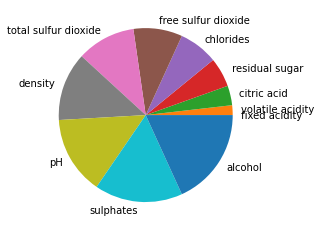

In [15]:
quality =[0,1,2,3,4,5,6,7,8,9,10]
items = ['fixed acidity','volatile acidity','citric acid',' residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol',]

#plotting data

plt.pie(x=quality , labels = items)
plt.show()

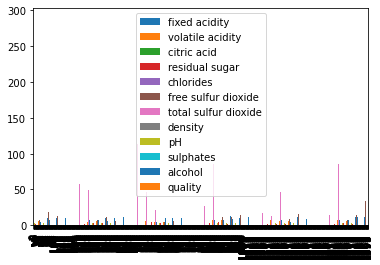

In [16]:
df.plot.bar()
plt.show()

In [19]:
df2 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv",sep = ",")
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
df2.columns

df2.info()

df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df2['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [22]:
df2['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [23]:
clean_df2 = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df2_copy = df2.copy()
df2_copy.replace(clean_df2, inplace=True)

In [24]:
df2_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


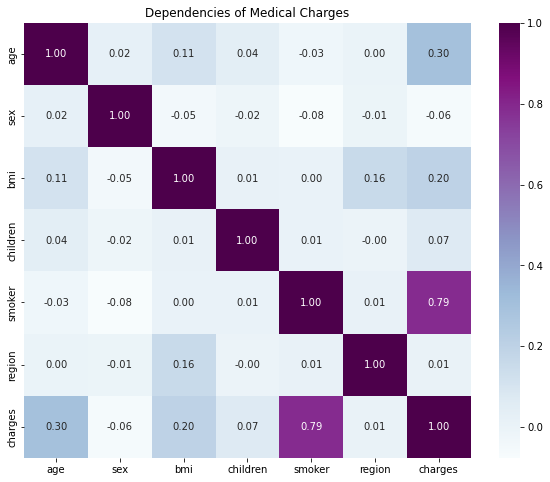

In [25]:
corr = df2_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [26]:
print(df2['sex'].value_counts().sort_values()) 
print(df2['smoker'].value_counts().sort_values())
print(df2['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

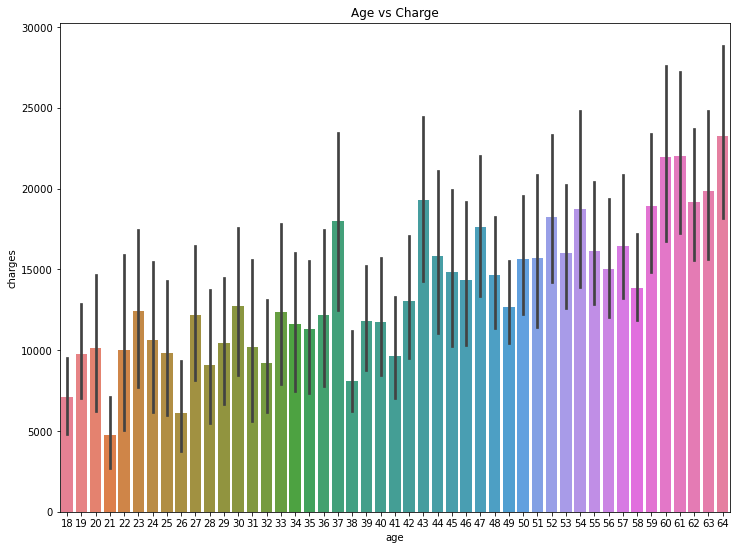

In [27]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df2_copy,palette='husl')